# Assignment 1: Image filtering and hybrid image
##### Student name: Yeongu Choe
##### Student ID: 77672566

In [1]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2

### Part 2: Gaussian filtering

#### Question 1: create box filter
* Write boxfilter(n) which returns a box filter of n by n.
* The function need to check that the argument n is odd number, using assert function.
* Filter should be numpy array.
* Cells in box filter have the same positive value which sums up to 1.

In [2]:
def boxfilter(n) -> np.ndarray:
    # Assert if the argument is odd number.
    assert n % 2 == 1, 'n is an even number'
    # Calculate value
    kernel_value = 1 / (n**2)
    # Create python 2D array
    pythonArray = [[kernel_value] * n] * n
    # Create numpy 2D matrix
    box_filter = np.array(pythonArray)
    return box_filter

##### Example


In [3]:
n = 3
boxfilter(n)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [4]:
# Expected to return error, because argument is an even number.
n = 4
boxfilter(n)

AssertionError: n is an even number

In [5]:
n = 5
boxfilter(n)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

#### Question 2: create 1 dimensional Gaussian filter
* Filter size should be $\lceil 6\sigma \rceil$.
* Each kernel value in the 1D filter is computed using $e^{-\frac{x^2}{2 \sigma^2}}$.
    * $x$ is the distance from the center of filter.
* Normalize the filter so that kernel values sums up to 1.

In [6]:
def gauss1d(sigma) -> np.ndarray:
    # calculate the size of 1D Gaussian filter
    size = math.ceil(sigma * 6)
    # round up to the next odd number, if necessary
    if size % 2 == 0:
        size = size + 1
    # create an array that contains distance from the center as element
    firstElement = -1 * (size // 2)
    x_array = [firstElement + i for i in range(size)]
    # compute Gaussian function for each element that represents the distance from the center of array
    gaussianFilterArray = [math.exp(-(x**2) / (2 * (sigma**2))) for x in x_array]
    # convert Gaussian filter array into numpy array
    gaussianFilter = np.array(gaussianFilterArray)
    # Normalize (Make the sum of kernel values to 1)
    sumOfElements = np.sum(gaussianFilter)
    gaussianFilter = gaussianFilter / sumOfElements
    return gaussianFilter

##### Example

In [7]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [8]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [9]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [10]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

#### Question 3: 2D **Gaussian** filter
* Use separable property of Gaussian filter to produce 2D Gaussian filter.

$$
\text{2D Gaussian filter} = \text{1D Gaussian} \star \text{1D Gaussian.Transpose}
$$

In [11]:
def gauss2d(sigma) -> np.ndarray:
    # create 1D Gaussian array
    gaussian1d = gauss1d(sigma)
    # Increase dimension of array
    gaussian1d = gaussian1d[np.newaxis]
    # create transpose of 1D Gaussian array
    transposeGaussian1d = np.transpose(gaussian1d)
    # Convolution on two 1d Gaussian numpy arrays
    gaussian2d = signal.convolve2d(gaussian1d, transposeGaussian1d)
    return gaussian2d

##### Example

In [12]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [13]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

#### Question 4: Convolution operation

##### (a) convolve2d_manual(array, filter)
* Parameter: image as 2D array, filter
* Pad the original image with zeroes.

In [38]:
def convolve2d_manual(array, filter) -> np.ndarray:
    # convert argument array into np.float32 type
    convertedArray = np.array(array, dtype=np.float32)
    # convert filter array into np.float32 type
    convertedFilter = np.array(filter, dtype=np.float32)
    # rotate filter 180 degrees
    convertedFilter = np.rot90(convertedFilter, k=2)
    # pad array with 0
    required_padding = math.floor(np.shape(filter)[0] / 2)
    paddedImage = np.pad(convertedArray, pad_width=required_padding)
    # find width and height of argument array
    img_width = np.shape(array)[1]
    img_height = np.shape(array)[0]
    # find width and height of filter array
    filter_width = np.shape(filter)[1]
    filter_height = np.shape(filter)[0]
    # Initialize output image
    output = np.zeros((img_height, img_width))
    # iterate through row(height)
    for row in range(required_padding, img_height + required_padding):
        # iterate through column(width)
        for column in range(required_padding, img_width + required_padding):
            # operate convolution
            output[row - required_padding][column - required_padding] = np.sum(
                paddedImage[
                    row - required_padding : row - required_padding + filter_height,
                    column
                    - required_padding : column
                    - required_padding
                    + filter_width,
                ]
                * convertedFilter
            )
    return output

##### (b) gaussconvolve2d_manual(array,sigma)
* Parameter: image as 2D array, sigma for Gaussian distribution

In [39]:
def gaussconvolve2d_manual(array, sigma):
    gaussianFilter = gauss2d(sigma)
    output = convolve2d_manual(array, gaussianFilter)
    return output

##### (c) run gaussconvolve2d on dog.jpg
* convert image into grey scale.
* run gaussconvolve2d with sigma 3

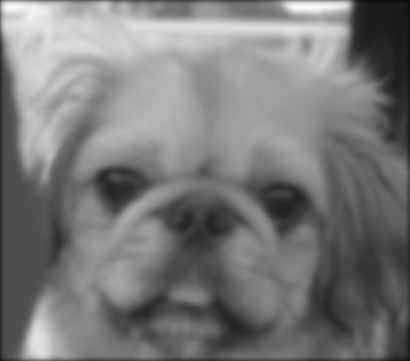

In [17]:
dogImage = Image.open("dog.jpg")
# convert image to grey scale
dogImage=dogImage.convert('L')
# convert to array
dogArray = np.asarray(dogImage)
# Gaussian filter array
filteredDogArray = gaussconvolve2d_manual(dogArray,3)
# convert image array into unsigned int
filteredDogArray=np.array(filteredDogArray, dtype=np.uint8)
filteredDogImage = Image.fromarray(filteredDogArray)
filteredDogImage.save("convertedDogWithManual.jpg","jpeg")
filteredDogImage

##### (d) Use PIL to show original and converted image

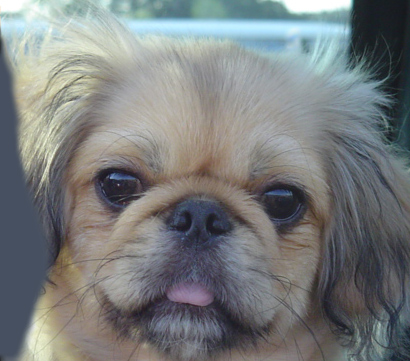

In [18]:
# Showing original dog image
originalDog = Image.open("dog.jpg")
# originalDog.show()
originalDog

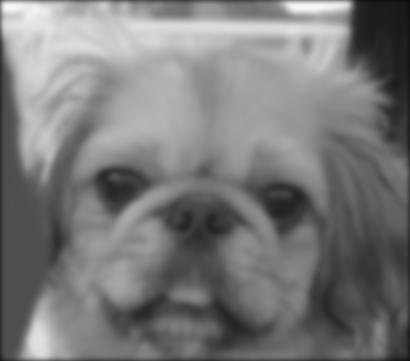

In [19]:
# Showing converted image
convertedDog = Image.open("convertedDogWithManual.jpg")
# convertedDog.show()
convertedDog

#### Question 5: create 1 dimensional Gaussian filter

##### (a) gaussconvolve2d_scipy(array,sigma)
* output is 2D array.
* process
    1. generate filter using gauss2d
    2. apply signal.convolve2d(array,filter,'same')

In [20]:
def gaussconvolve2d_scipy(array,sigma):
    filter = gauss2d(sigma)
    return signal.convolve2d(array,filter,'same')


##### (b) apply on dog.jpg
* Use sigma value to be 3
* Convert into greyscale
* Save to image

In [21]:
dogImage2 = Image.open("dog.jpg")
# convert to grey scale
dogImage2=dogImage2.convert('L')
dogArray2 = np.asarray(dogImage2)
dogArray2 = gaussconvolve2d_scipy(dogArray2,3)
# convert from array into np array
dogArray2 = np.array(dogArray2,dtype=np.uint8)
# convert back to image
filteredDogImage2 = Image.fromarray(dogArray2)
# save Image
filteredDogImage2.save("convertedDogWithScipy.jpg","jpeg")


##### (d) Use PIL to show original and converted image

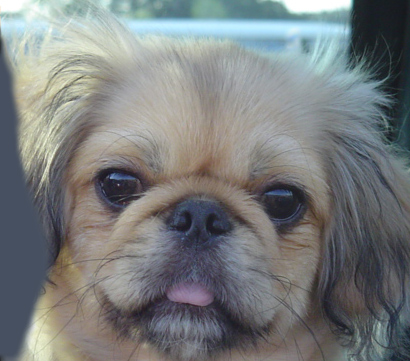

In [22]:
# Showing original dog image
originalDog = Image.open("dog.jpg")
# originalDog.show()
originalDog

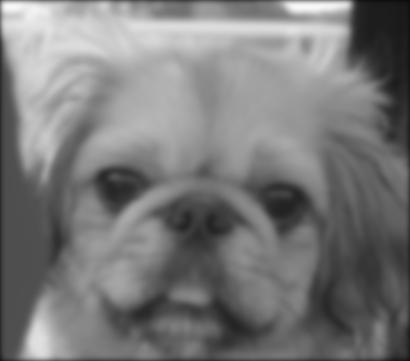

In [23]:
# Showing converted image
convertedDog = Image.open("convertedDogWithScipy.jpg")
# convertedDog.show()
convertedDog

#### Question 6: Measure time for gaussconvolve2d_manual and gaussconvolve2d_scipy
* Use sigma 10
* Comment the result and analysis

In [24]:
import time

dog = Image.open("dog.jpg")
dog = dog.convert('L')
dogArray = np.asarray(dog)

In [25]:
# measuring running time of manual Gaussian
t1 = time.time()
gaussconvolve2d_manual(dogArray,3)
duration = time.time()-t1
print(f"T(manual 2D Gaussian): {duration}")

T(manual 2D Gaussian): 0.5717101097106934


In [26]:
# measuring running time of scipy Gaussian
t1 = time.time()
gaussconvolve2d_scipy(dogArray,3)
duration = time.time()-t1
print(f"T(scipy 2D Gaussian): {duration}")

T(scipy 2D Gaussian): 0.05130648612976074


##### Reason why "gaussconvolve2d_scipy" is faster than "gaussconvolve2d_manual"
* Scipy library use fast fourier transform (FFT), when manual version calculate 2D Gaussian filter running outer product of two 1D gaussian filters.
* Scipy library is optimized to accelerate compile speed with Cython.

#### Question 7: Convolution with 2D Gaussian is less efficient than using seperability property
* In Convolution with 2D Gaussian filter, we have to compute ${\text{(width of filter)}^2}$ times for each cell in image.
    * If we say width of square kernel is $m$, and the width of square image is $n$, then we need $O(m^2n^2)$ time complexity.
* In seperable 2D Gaussian, we run $m$ size 1D convolution twice on $n^2$ sized square image.
    * Therefore, the time complexity is $O(2mn^2)$

### Part 3: Hybrid image

#### Question 1: run gaussian filter and get color image (Low frequency image)
* Use large sigma
* Filter each RGB channel

$$
\text{Low pass filter} = I\star G
$$

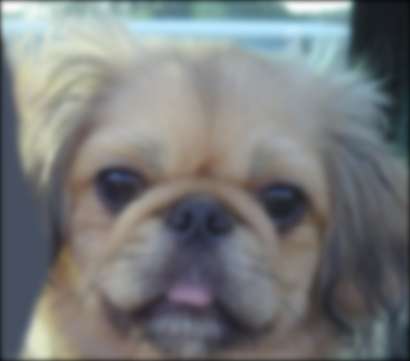

In [27]:
# API
# function: separate image into RGB channels, then run Gaussian filtering for each channels
# Output: blurred image
def lowPassFiltering(imagePath: str, sigma: float):
    # open image file
    img = Image.open(imagePath)
    # record the mode of original image
    imgMode = img.mode
    # separate into rgb channels
    redChannel, greenChannel, blueChannel = img.split()
    # convert each channels into numpy array
    redChannel = np.asarray(redChannel)
    greenChannel = np.asarray(greenChannel)
    blueChannel = np.asarray(blueChannel)
    # run Gaussian filtering for each channel
    redChannel = gaussconvolve2d_scipy(redChannel, sigma)
    greenChannel = gaussconvolve2d_scipy(greenChannel, sigma)
    blueChannel = gaussconvolve2d_scipy(blueChannel, sigma)
    # convert numpy array into image
    redChannel = Image.fromarray(redChannel)
    greenChannel = Image.fromarray(greenChannel)
    blueChannel = Image.fromarray(blueChannel)
    # convert image into greyscale(8 bit pixel)
    redChannel = redChannel.convert("L")
    greenChannel = greenChannel.convert("L")
    blueChannel = blueChannel.convert("L")
    # merge image of three channels into one RGB mode image
    output = Image.merge(img.mode, (redChannel, greenChannel, blueChannel))
    return output

# run low pass filter on dog image
lowPassFiltering("hw1/0b_dog.bmp", 3)

#### Question 2: run high pass filter
* Operate on each RGB channels.
* Use same sigma for channels.
* Process
    1. Compute low frequency filtered image
    2. Subtract low pass filtered image from original image
    3. Add 128 to all pixels

$$
\text{High pass filter} = I-I\star G
$$

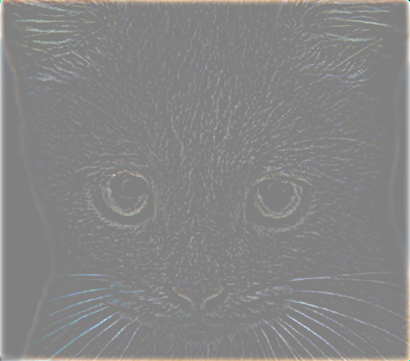

In [28]:
# API
# function: substract low pass filtered image from original image, then add 128 to every pixel in the image
# output: sharpened image
def highPassFiltering(imagePath: str, sigma: float):
    # open image
    img = Image.open(imagePath)
    # record the mode of original image
    imgMode = img.mode
    # separate image into rgb channels
    redChannel, greenChannel, blueChannel = img.split()
    # convert each channels into numpy array
    redChannel = np.asarray(redChannel)
    greenChannel = np.asarray(greenChannel)
    blueChannel = np.asarray(blueChannel)
    # run Gaussian filtering for each channel, then initialize to gaussian filtered channel
    lpRedChannel = gaussconvolve2d_scipy(redChannel, sigma)
    lpGreenChannel = gaussconvolve2d_scipy(greenChannel, sigma)
    lpBlueChannel = gaussconvolve2d_scipy(blueChannel, sigma)
    # subtract low passed channels from original channels
    redChannel = redChannel - lpRedChannel
    greenChannel = greenChannel - lpGreenChannel
    blueChannel = blueChannel - lpBlueChannel
    # # add 128 to all pixels, for visualization
    # redChannel += 128
    # greenChannel += 128
    # blueChannel += 128
    # convert numpy array into image
    redChannel = Image.fromarray(redChannel)
    greenChannel = Image.fromarray(greenChannel)
    blueChannel = Image.fromarray(blueChannel)
    # convert image into greyscale(8 bit pixel)
    redChannel = redChannel.convert("L")
    greenChannel = greenChannel.convert("L")
    blueChannel = blueChannel.convert("L")
    # merge image of three channels into one RGB mode image
    output = Image.merge(imgMode, (redChannel, greenChannel, blueChannel))
    return output

# API
# function: add 128 to each RGB channels
# output: brighter high passed filtered image
def highPassFilteredVisualizer(highPassFilteredImage: Image.Image):
    redChannel, greenChannel, blueChannel = highPassFilteredImage.split()
    # convert channels into numpy array
    redChannel = np.asarray(redChannel)
    greenChannel = np.asarray(greenChannel)
    blueChannel = np.asarray(blueChannel)
    redChannel = redChannel + 128
    greenChannel = greenChannel + 128
    blueChannel = blueChannel + 128
    # convert back to Image channel format
    redChannel = Image.fromarray(redChannel).convert("L")
    greenChannel = Image.fromarray(greenChannel).convert("L")
    blueChannel = Image.fromarray(blueChannel).convert("L")
    output = Image.merge("RGB", (redChannel, greenChannel, blueChannel))
    return output


a = highPassFiltering("hw1/0a_cat.bmp", 3)
highPassFilteredVisualizer(a)

#### Question 3: Low pass filtered image + High pass filtered image
* add low frequency and high frequency image together
* For high frequency image, divide by means of image intensity??
* For high frequency image, don't add 128

In [29]:
# API
# Input: path of two animal pictures, sigma(standard deviation)
# function: add low pass filtered image and high pass filtered image together
def hybridImageGenerator(imagePath1: str, imagePath2: str, sigma: float):
    # get low pass filtered image of the 1st image
    lowPassFilteredImage = lowPassFiltering(imagePath1, sigma)
    # get high pass filtered image of the 2nd image
    highPassFilteredImage = highPassFiltering(imagePath2, sigma)
    # split two images into two rgb channels
    lpRedChannel, lpGreenChannel, lpBlueChannel = lowPassFilteredImage.split()
    hpRedChannel, hpGreenChannel, hpBlueChannel = highPassFilteredImage.split()

    # convert all channels into numpy array
    lpRedChannel = np.asarray(lpRedChannel)
    lpGreenChannel = np.asarray(lpGreenChannel)
    lpBlueChannel = np.asarray(lpBlueChannel)
    hpRedChannel = np.asarray(hpRedChannel)
    hpGreenChannel = np.asarray(hpGreenChannel)
    hpBlueChannel = np.asarray(hpBlueChannel)

    # perform low passed channel + high passed channel
    hybridRedChannel = lpRedChannel + hpRedChannel
    hybridGreenChannel = lpGreenChannel + hpGreenChannel
    hybridBlueChannel = lpBlueChannel + hpBlueChannel

    # convert numpy array into image
    hybridRedChannel = Image.fromarray(hybridRedChannel)
    hybridGreenChannel = Image.fromarray(hybridGreenChannel)
    hybridBlueChannel = Image.fromarray(hybridBlueChannel)
    # convert F image into greyscale image
    hybridRedChannel = hybridRedChannel.convert("L")
    hybridGreenChannel = hybridGreenChannel.convert("L")
    hybridBlueChannel = hybridBlueChannel.convert("L")

    # merge image into one RGB mode image
    output = Image.merge(
        "RGB", (hybridRedChannel, hybridGreenChannel, hybridBlueChannel)
    )
    return output

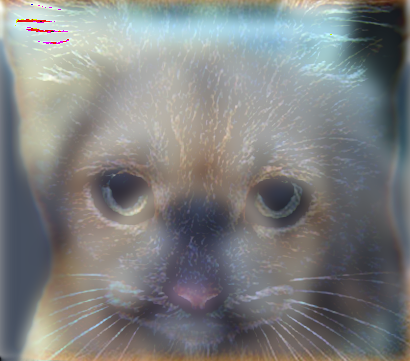

In [30]:
# Cat example
hybridImageGenerator("hw1/0b_dog.bmp", "hw1/0a_cat.bmp", 7)

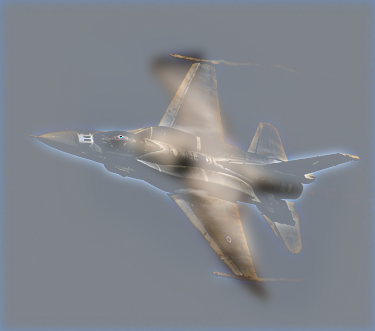

In [31]:
# Example: Bird + Plane
hybridImageGenerator("hw1/4a_bird.bmp","hw1/4b_plane.bmp", 5)

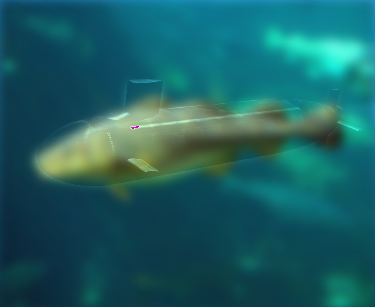

In [32]:
# Example: Fish + Submarine
hybridImageGenerator("hw1/3a_fish.bmp","hw1/3b_submarine.bmp", 5)

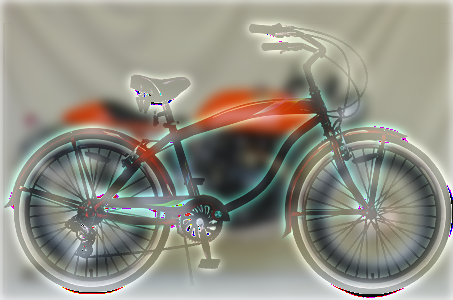

In [33]:
# Example: Motocycle + Bike
hybridImageGenerator("hw1/1b_motorcycle.bmp", "hw1/1a_bicycle.bmp", 5)

### Part 4: Denoise image with OpenCV
* Denoise box_gauss.png and box_speckle.png
* Use ‘cv2.GaussianBlur’, ‘cv2.bilateralFilter’, and ‘cv2.medianBlur’

#### Question 1

##### (a) Denoising "box_gauss.png"

In [34]:
gaussianBoxImage = cv2.imread("box_gauss.png")

# Denoising with Gaussian filter
# Parameter: image, gaussian kernel size, sigma
gaussianBoxWithGaussianFilter = cv2.GaussianBlur(gaussianBoxImage, (29, 29), 5)

# Denoising with Bilateral filter
# Parameter: image, distance between neighboring pixel, color sigma, coordinate sigma
gaussianBoxWithBilateralFilter = cv2.bilateralFilter(gaussianBoxImage, 15, 250, 250)

# Denoising with Median filter
# Parameter: image, length of kernel
gaussianBoxWithMedianFilter = cv2.medianBlur(gaussianBoxImage, 11)

cv2.imshow("box_gauss.png (Original)", gaussianBoxImage)
cv2.imshow("box_gauss.png (Gaussian filtered)", gaussianBoxWithGaussianFilter)
cv2.imshow("box_gauss.png (Bilateral filtered)", gaussianBoxWithBilateralFilter)
cv2.imshow("box_gauss.png (Median filtered)", gaussianBoxWithMedianFilter)

cv2.waitKey(0)
cv2.destroyAllWindows()

##### (b) Denoising "box_speckle.png"

In [35]:
speckleBoxImage = cv2.imread("box_speckle.png")

# Denoising with Gaussian filter
# Parameter: image, gaussian kernel size, sigma
speckleBoxWithGaussianFilter = cv2.GaussianBlur(speckleBoxImage, (51, 51), 7)

# Denoising with Bilateral filter
# Parameter: image, distance between neighboring pixel, color sigma, coordinate sigma
speckleBoxWithBilateralFilter = cv2.bilateralFilter(speckleBoxImage, 17, 300, 300)

# Denoising with Median filter
# Parameter: image, length of kernel
speckleBoxWithMedianFilter = cv2.medianBlur(speckleBoxImage, 15)

cv2.imshow("box_speckle.png (Original)", speckleBoxImage)
cv2.imshow("box_speckle.png (Gaussian filtered)", speckleBoxWithGaussianFilter)
cv2.imshow("box_speckle.png (Bilateral filtered)", speckleBoxWithBilateralFilter)
cv2.imshow("box_speckle.png (Median filtered)", speckleBoxWithMedianFilter)

cv2.waitKey(0)
cv2.destroyAllWindows()

##### Question 2
* Use following combination for denoising.
    ```python
    import cv2
    cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=50)
    cv2.bilateralFilter(img, 7, sigmaColor=150, sigmaSpace=150)
    cv2.medianBlur(img,7)
    ```

##### (a) Denoising "box_gauss.png" with given parameter combination.

In [36]:
import cv2

# open image with OpenCV
originalSpeckleBox = cv2.imread("box_gauss.png")

# Gaussian filtering with given combination
gaussianFiltered = cv2.GaussianBlur(originalSpeckleBox, ksize=(7, 7), sigmaX=50)

# Bilateral filtering with given combination
bilateralFiltered = cv2.bilateralFilter(originalSpeckleBox, 7, sigmaColor=150, sigmaSpace=150)

# Median filtering with given combination
medianFiltered = cv2.medianBlur(originalSpeckleBox, 7)

# Show image windows for each filtered images
cv2.imshow("box_gauss.png (Original)", originalSpeckleBox)
cv2.imshow("box_gauss.png (Gaussian filtered)", gaussianFiltered)
cv2.imshow("box_gauss.png (Bilateral filtered)", bilateralFiltered)
cv2.imshow("box_gauss.png (Median filtered)", medianFiltered)

# if a key is pressed, the windows close
cv2.waitKey(0)
cv2.destroyAllWindows()

##### (b) Denoising "box_speckle.png" with given parameter combination.

In [37]:
import cv2

# open image with OpenCV
originalSpeckleBox = cv2.imread("box_speckle.png")

# Gaussian filtering with given combination
gaussianFiltered = cv2.GaussianBlur(originalSpeckleBox, ksize=(7, 7), sigmaX=50)

# Bilateral filtering with given combination
bilateralFiltered = cv2.bilateralFilter(originalSpeckleBox, 7, sigmaColor=150, sigmaSpace=150)

# Median filtering with given combination
medianFiltered = cv2.medianBlur(originalSpeckleBox, 7)

# Show image windows for each filtered images
cv2.imshow("box_speckle.png (Original)", originalSpeckleBox)
cv2.imshow("box_speckle.png (Gaussian filtered)", gaussianFiltered)
cv2.imshow("box_speckle.png (Bilateral filtered)", bilateralFiltered)
cv2.imshow("box_speckle.png (Median filtered)", medianFiltered)

# if a key is pressed, the windows close
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Pros and Cons of Gaussian, Bilateral, and Median filter

##### Gaussian filter
* Pros
    * It is used in smoothing image.
    * It is effective in reducing high frequency noise.
* Cons
    * It significantly blurs the original image.

##### Bilateral filter
* Pros
    * It preserves edge.
    * It can be used for cartooning image.
* Cons
    * It blurs the artifact in the original image.

##### Median filter
* Pros
    * It does not cause significant blurring.
    * It reduced most noise with the given combination.
    * It effectively reduce "shot noise" and "salt and pepper noise".
* Cons
    * Edge is blurred.